<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

### 
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Review](#0)<br>
2.  [Skewness](#2)<br> 
3.  [Kutosis](#4)<br>    
4.  [Aggregating Data](#6)<br> 
5.  [Quartiles](#8)<br>   
6.  [Deciles](#10)<br>     
7.  [Exercise 1](#12)<br> 
8.  [Exercise 2](#14)<br>
9.  [Exercise 3](#16)<br>    
</div>
<hr>

<h2>Review</h2><a id="0"></a>

<h2>Exercise</h2>
You have the following dictionary that contains sales data.<br>
<code>
sales = {'Jan': 150, 'Feb':200, 'Mar': 175,
        'April': 75, 'May': 80, 'Jun': 300,
        'July': 250, 'August':130, 'September': 195,
        'October': 75, 'November': 120, 'December': 400}
</code>
<br>
Answer the following:<br>
1 - List the months where sales are greater than or equal to 150<br>
2 - Return a tuple of all months and sales amounts greater than or equal to 300<br>
3 - List all 3 consecutive month periods where sales are below 500<br>
4 - Include the total sales amount for answer 3

<h4>Solution</h4>

In [ ]:
sales = {'Jan': 150, 'Feb':200, 'Mar': 175, 'April': 75, 'May': 80, 'Jun': 300, 'July': 250, 'August':130, 'September': 195, 'October': 75, 'November': 120, 'December': 400}
months = [mon for mon, val in sales.items() if val >= 150]
print(months)

#2
months = [(mon, val) for mon, val in sales.items() if val >=300]
print(months)
#3
keys = list(sales.keys())
months = [f'{keys[i]}, {keys[i+1]}, {keys[i+2]}' for i in range(10) if sales[keys[i]] + sales[keys[i+1]] + sales[keys[i+2]] <500]
print(months)
#4
months = [ f'{keys[x]},{keys[x+1]},{keys[x+2]}: {sales[keys[x]] + sales[keys[x+1]] + sales[keys[x+2]]}' 
          for x in range(9) if sales[keys[x]] + sales[keys[x+1]] + sales[keys[x+2]]< 500]

print(months)

['Jan', 'Feb', 'Mar', 'Jun', 'July', 'September', 'December']
[('Jun', 300), ('December', 400)]
['Feb, Mar, April', 'Mar, April, May', 'April, May, Jun', 'August, September, October', 'September, October, November']
['Feb,Mar,April: 450', 'Mar,April,May: 330', 'April,May,Jun: 455', 'August,September,October: 400', 'September,October,November: 390']


<h2>Exercise</h2>
<code>
stock_price = [23.5, 24.1, 22.7, 24.2, 25.2, 28.4, 27.8, 26.5, 27.5, 28.2]
</code>
<br>
1 - Calculate the mean stock price<br>
2 - Count the number of times the stock price was greater than 25<br>
3 - Calculate the daily rate of return for the series<br>
NOTE: rate of return is ((current price-previous price)/previous_price) * 100<br>
Example: price was 100 next day 105 then ((105-100)/100)*100 = 5% gain<br>
4 - How many days was the price up 3% or down 3% from the previous day?<br>


<h4>Solution</h4>

<h2>Skewness</h2>
Skewness is a measure of symetry, or better the lack of symetry.<br>
A distribution of data set is symetric if it looks the same on the left and right side of the mean.<br>
We aggregate the data and use a histogram to visualize if the distribution is normal.<br>
<br>
The skewness formula is as follows:<br>
Fisher-Pearson coefficient<br>
<br>
$\sum_{i=1}^{n} ((X_i - mean)^3$/n)/$s^3$<br><br>
We can also use the formula for the adjusted Fisher-Pearson coefficient of skewness<br>
<br>
$\sqrt N(N-1)/(N-2)$ $\sum_{i=1}^{n} ((X_i - mean)^3$/n)/$s^3$<br><br>
As the size of our sample goes up the first part of the equations coverges to 1<br>
<br>
The skewness of a nomal distribution is 0<br>

1) Calculate the mean
2) Subtract the mean from each element
3) Cube the differences
4) Sum the differences
5) Divide by the list size  
6) Divide by the STdev cubed
6) Return Skewness 

In [ ]:
grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 
 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 
 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 
 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 
 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 
 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]
import statistics
def calc_skew(lst):
  lst.sort()
  mean = sum(lst)/len(lst)
  skew = sum([(x-mean)**3 for x in lst])/len(lst)
  return round(skew/(statistics.stdev(lst)**3),2)
print(calc_skew(grades))


-0.09


<h2>Kurtosis</h2>
The kurtosis for a standard normal distribution is three. <br>
The formula for excess kutosis is:<br>
<br>
Excess
$\sum_{i=1}^{n} ((X_i - mean)^4$/n)/$s^4$ -3 
<br><br>
Regular
$\sum_{i=1}^{n} ((X_i - mean)^4$/n)/$s^4$ 
<br><br>
This definition is used so that the standard normal distribution has a kurtosis of zero. <br>
In addition, with the second definition positive kurtosis indicates a "heavy-tailed" distribution <br>
and negative kurtosis indicates a "light tailed" distribution.<br>
<br>
Which definition of kurtosis is used is a matter of convention. <br>
When using software to compute the sample kurtosis, you need to be aware of which convention <br>
is being followed. Many sources use the term kurtosis when they are actually computing "excess kurtosis", <br>
so it may not always be clear. <br>

In [ ]:
grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 
 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 
 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 
 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 
 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 
 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]

def calc_excess_kurtosis(lst):
    mean = sum(lst)/len(lst)
    kurt_part1 = sum([(x-mean)**4 for x in lst])/len(lst)
    return (round(kurt_part1/(statistics.stdev(lst)**4),3)) - 3
print(calc_kur(grades))
print(calc_skew(grades))

-0.77
-0.09


<h2>Exercise</h2>
Calculate the skewness (Fisher-Pearson coefficient) of our original grades file.<br>
Calculate the skewness (adjusted Fisher-Pearson coefficient) of our original grades file.<br>
Calculate the excess kurtosis of our data set>br>
<code>
grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 
 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 
 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 
 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 
 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 
 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]
</code>


<h4>Solution</h4>

<h2>Aggregating Data</h2>
To visualize the 100 grade values the chart would look crowded<br>
Let's chart the data now.<br>

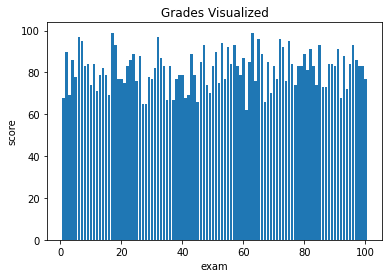

In [ ]:
import matplotlib.pyplot as plt
grades = [68.0, 90.0, 69.0, 86.0, 78.0, 97.0, 95.0, 83.0, 84.0, 74.0, 84.0, 71.0, 79.0, 82.0, 79.0, 69.0, 99.0, 93.0, 77.0, 77.0, 75.0, 83.0, 86.0, 89.0, 76.0, 88.0, 65.0, 65.0, 78.0, 77.0, 82.0, 97.0, 87.0, 83.0, 67.0, 83.0, 67.0, 77.0, 79.0, 79.0, 68.0, 69.0, 89.0, 79.0, 66.0, 85.0, 93.0, 74.0, 70.0, 83.0, 90.0, 75.0, 94.0, 77.0, 92.0, 84.0, 93.0, 83.0, 79.0, 87.0, 62.0, 85.0, 99.0, 76.0, 96.0, 89.0, 66.0, 85.0, 70.0, 83.0, 77.0, 96.0, 92.0, 76.0, 95.0, 84.0, 74.0, 83.0, 83.0, 89.0, 81.0, 91.0, 83.0, 74.0, 93.0, 73.0, 73.0, 84.0, 84.0, 83.0, 91.0, 68.0, 88.0, 72.0, 84.0, 93.0, 86.0, 83.0, 83.0, 77.0]
xAxis = range(1,len(grades)+1)
plt.bar(xAxis, grades)
plt.title("Grades Visualized")
plt.xlabel('exam')
plt.ylabel('score')
plt.show()

We notice that the grades data is crowded.  We need to add meaning to <br>
the visualization of this data.  We do this by aggregating the data.<br>
<br>

<h2>Exercise</h2>
If we have a group of numbers from 0 to 20 how can we set the boundaries <br>
For creating a frequency distribution histogram in qurtiles<br>

In [ ]:
import math 
interval = math.ceil(20/4)
quartiles = {1:[], 2:[], 3:[], 4:[]}
val = 0
for k, v in quartiles.items():
  quartiles[k] = [val +(interval*int(k-1)), val + interval*int(k)]
print(quartiles)


{1: [0, 5], 2: [5, 10], 3: [10, 15], 4: [15, 20]}


<h4>Deciles</h4>
Break the data set into 10 equal parts and chart the number of items that<br>
fall within each boundary.

<h2>Exercise</h2>
Creating the boundaries for the deciles consists of dividing the range into<br>
10 intervals.  Create a function to calculate the boundaries for deciles of<br>
a data set the goes from 100 to 150.

<h4>Solution</h4>

<h4>Frequency distribution chart</h4>

<h4>Cumulative Frequency distribution chart</h4>

<h2>Exercise</h2>
Suppose we have data like the following:<br>
<code>
sat_scores = [540, 590, 780, 720, 680, 570, 590, 600, 600, 610]
</code>
<br>
Calculate what percentage of students are above the 50th percentile and what percentage<br>
score below the 50th percentile<br>
HINT: You need to calculate the median of the data set<br>

<h2>Exercise</h2>
Take the grades data and chart the frequency distribution and the cumulative<br>
frequency distribution in quartiles

This notebook is part of a course at www.codeimmersives.com called Data Science. If you accessed this notebook outside the course, you can get more information about this course online by clicking here.

<hr>

Copyright &copy; 2021  Code Immersives